<a href="https://colab.research.google.com/github/JuannMontoya/Teoria_Aprendizaje_Maquinas_2025-2/blob/main/Tareas/projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

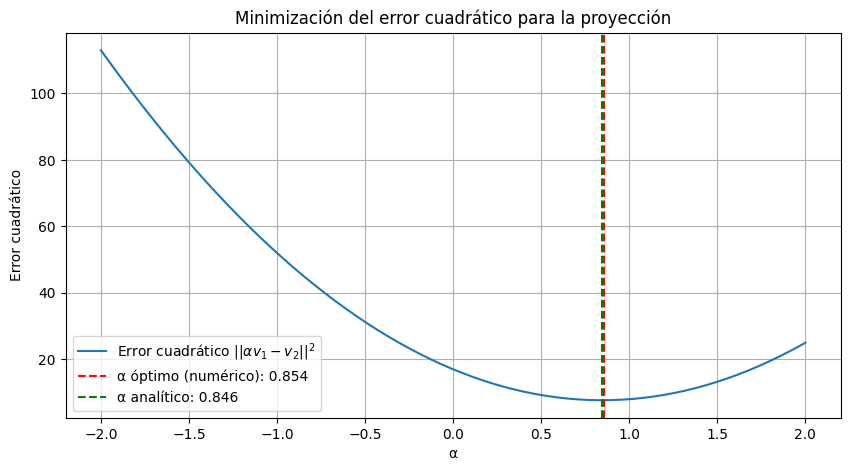

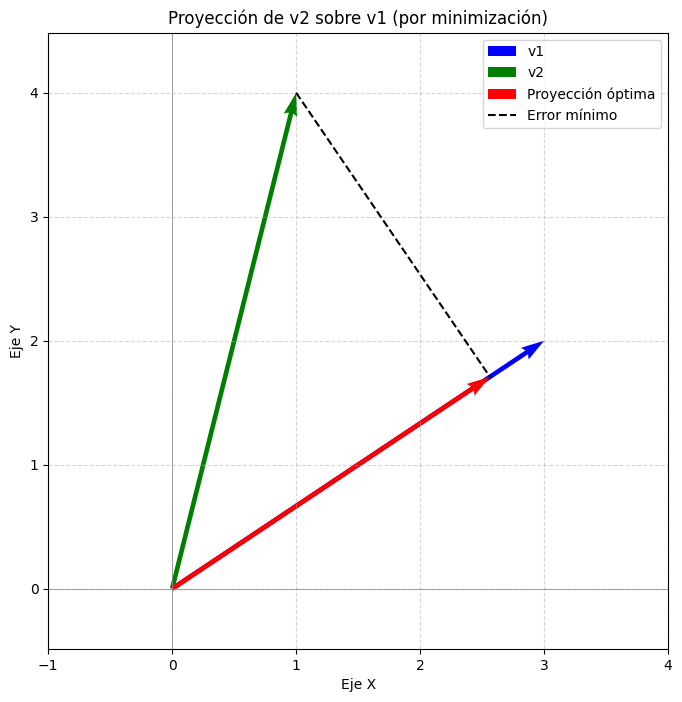

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vectores
v1 = np.array([3, 2])
v2 = np.array([1, 4])

# Rango de alpha
alphas = np.linspace(-2, 2, 200)

# Error cuadrático vectorizado
errors = np.linalg.norm(alphas[:, None] * v1 - v2, axis=1) ** 2

# Alpha óptimo (mínimo error)
min_index = np.argmin(errors)
alpha_opt = alphas[min_index]
projection_opt = alpha_opt * v1

# Alpha analítico
alpha_analytic = np.dot(v2, v1) / np.dot(v1, v1)

# --- Gráfico del error cuadrático ---
plt.figure(figsize=(10, 5))
plt.plot(alphas, errors, label=r'Error cuadrático $||\alpha v_1 - v_2||^2$')
plt.axvline(alpha_opt, color='red', linestyle='--', label=f'α óptimo (numérico): {alpha_opt:.3f}')
plt.axvline(alpha_analytic, color='green', linestyle='--', label=f'α analítico: {alpha_analytic:.3f}')
plt.xlabel('α')
plt.ylabel('Error cuadrático')
plt.title('Minimización del error cuadrático para la proyección')
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico de los vectores ---
plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')

# Vectores
plt.quiver(0, 0, *v1, angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
plt.quiver(0, 0, *v2, angles='xy', scale_units='xy', scale=1, color='green', label='v2')
plt.quiver(0, 0, *projection_opt, angles='xy', scale_units='xy', scale=1, color='red', label='Proyección óptima')

# Línea perpendicular desde v2 hasta la proyección
plt.plot([v2[0], projection_opt[0]], [v2[1], projection_opt[1]], 'k--', label='Error mínimo')

plt.legend()
plt.title("Proyección de v2 sobre v1 (por minimización)")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")

# Límites automáticos
all_points = np.array([v1, v2, projection_opt])
plt.xlim(min(0, all_points[:, 0].min()) - 1, max(0, all_points[:, 0].max()) + 1)
plt.ylim(min(0, all_points[:, 1].min()) - 1, max(0, all_points[:, 1].max()) + 1)

plt.show()


Distancia target - imagen1: 5441.567
Distancia target - imagen2: 9036.759
Similitud coseno target - imagen1: 0.92342585
Similitud coseno target - imagen2: 0.8102605


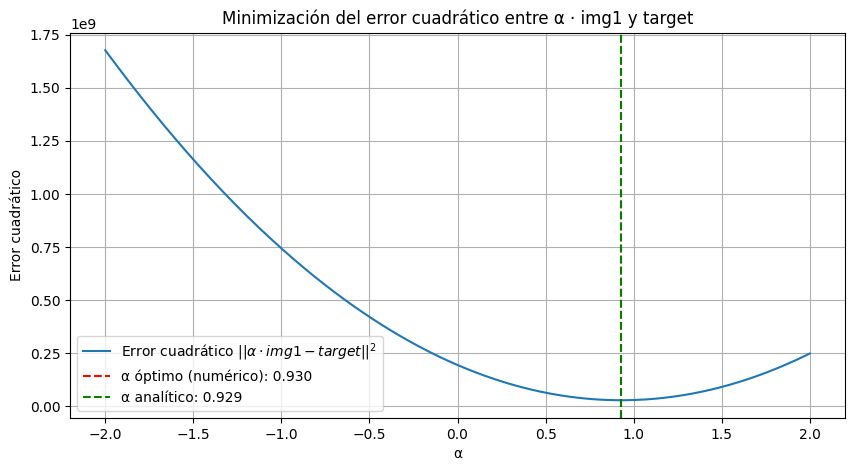

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def cargar_imagen(ruta, size=(100, 100)):
    img = Image.open(ruta).convert("L")
    img = img.resize(size)
    matriz = np.array(img, dtype=np.float32)
    return matriz.flatten(), size

def distancia_euclidiana(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def producto_punto_normalizado(vec1, vec2):
    numerador = np.dot(vec1, vec2)
    denom = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    if denom == 0:
        return 0
    return numerador / denom

# Cargar imágenes
img1, size = cargar_imagen("/content/montoya1.jpg")
img2, _ = cargar_imagen("/content/carolina.jpg")
target, _ = cargar_imagen("/content/montoya2.jpg")

# Distancias y similitudes
d1 = distancia_euclidiana(target, img1)
d2 = distancia_euclidiana(target, img2)
p1 = producto_punto_normalizado(target, img1)
p2 = producto_punto_normalizado(target, img2)

print("Distancia target - imagen1:", d1)
print("Distancia target - imagen2:", d2)
print("Similitud coseno target - imagen1:", p1)
print("Similitud coseno target - imagen2:", p2)

# Proyección por búsqueda de alpha
alphas = np.linspace(-2, 2, 300)
errors = []

for alpha in alphas:
    projection = alpha * img1
    error = np.linalg.norm(projection - target) ** 2
    errors.append(error)

errors = np.array(errors)
min_idx = np.argmin(errors)
alpha_opt = alphas[min_idx]
projection_opt = alpha_opt * img1

# Proyección analítica
alpha_analytic = np.dot(target, img1) / np.dot(img1, img1)
projection_analytic = alpha_analytic * img1

# Graficar error cuadrático
plt.figure(figsize=(10, 5))
plt.plot(alphas, errors, label='Error cuadrático $||\\alpha \\cdot img1 - target||^2$')
plt.axvline(alpha_opt, color='red', linestyle='--', label=f'α óptimo (numérico): {alpha_opt:.3f}')
plt.axvline(alpha_analytic, color='green', linestyle='--', label=f'α analítico: {alpha_analytic:.3f}')
plt.xlabel('α')
plt.ylabel('Error cuadrático')
plt.title('Minimización del error cuadrático entre α · img1 y target')
plt.legend()
plt.grid(True)
plt.show()

